### Working with IUCN data in shapefiles

#### just some logging/plotting magic to output in this notebook, nothing to care about.

In [1]:
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())
%matplotlib inline

## 1. Load a shapefile with all turtles data. At this point no data cleaning is done yet.

In [2]:
# download http://bit.ly/1R8pt20 (zipped Turtles shapefiles), and unzip them
from iSDM.species import IUCNSpecies
turtles = IUCNSpecies(name_species='Acanthochelys pallidipectoris')
turtles.load_shapefile('../data/FW_TURTLES/FW_TURTLES.shp')

Loading data from: ../data/FW_TURTLES/FW_TURTLES.shp
The shapefile contains data on 181 species.


#### Show only first 5 species (meta)data, to get an idea of the data structure.

In [3]:
turtles.get_data().head()

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_Area,shape_Leng,source,species_na,subpop,subspecies,tax_comm,year
0,Batagur baska,CR,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Batagur,(POLYGON ((88.17095947265625 21.91680908203125...,2614.0,...,1.0,1.0,11.002731,126.804751,CBFTT,baska,None,None,None,2013.0
1,Cuora galbinifrons,CR,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Cuora,"(POLYGON ((105.4661254882812 21.1263427734375,...",5955.0,...,1.0,1.0,16.619326,52.207722,CBFTT,galbinifrons,None,None,None,2013.0
2,Graptemys pseudogeographica,LC,CRF,REPTILIA,Rhodin,None,EMYDIDAE,Graptemys,"(POLYGON ((-95.635009765625 35.36834716796875,...",165600.0,...,1.0,1.0,97.575806,256.031805,CBFTT,pseudogeographica,None,None,None,2013.0
3,Malaclemys terrapin,LR/nt,CRF,REPTILIA,Rhodin,None,EMYDIDAE,Malaclemys,"(POLYGON ((-76.6082763671875 39.25, -76.615722...",12695.0,...,1.0,1.0,11.345627,347.909301,CBFTT,terrapin,None,None,None,2013.0
4,Melanochelys trijuga,LR/nt,CRF,REPTILIA,Rhodin,None,GEOEMYDIDAE,Melanochelys,(POLYGON ((84.14166259765625 26.06658935546875...,13039.0,...,1.0,1.0,172.597842,326.610136,CBFTT,trijuga,None,None,None,2013.0


In [4]:
turtles.get_data().columns # all the columns available per species geometry

Index(['binomial', 'category', 'citation', 'class_name', 'compiler',
       'dist_comm', 'family_nam', 'genus_name', 'geometry', 'id_no', 'island',
       'kingdom_na', 'legend', 'order_name', 'origin', 'phylum_nam',
       'presence', 'seasonal', 'shape_Area', 'shape_Leng', 'source',
       'species_na', 'subpop', 'subspecies', 'tax_comm', 'year'],
      dtype='object')

## 2. Filter species by the name given above

In [5]:
turtles.find_species_occurrences()

Loaded species: ['Acanthochelys pallidipectoris'] 


In [6]:
turtles.get_data() # datatype: geopandas.geodataframe.GeoDataFrame

,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_Area,shape_Leng,source,species_na,subpop,subspecies,tax_comm,year
138,Acanthochelys pallidipectoris,VU,CRF,REPTILIA,Rhodin,None,CHELIDAE,Acanthochelys,POLYGON ((-59.20001220703125 -28.0374755859375...,75.0,...,1.0,1.0,36.632836,54.770042,CBFTT,pallidipectoris,None,None,None,2013.0


In [7]:
turtles.save_data() # serialize all the current data to a pickle file, so it can be loaded later on

Saved data: /home/daniela/git/iSDM/notebooks/Acanthochelys pallidipectoris75.pkl 


In [8]:
turtles.load_data()

Loading data from: /home/daniela/git/iSDM/notebooks/Acanthochelys pallidipectoris75.pkl
Succesfully loaded previously saved data.


,binomial,category,citation,class_name,compiler,dist_comm,family_nam,genus_name,geometry,id_no,...,presence,seasonal,shape_Area,shape_Leng,source,species_na,subpop,subspecies,tax_comm,year
138,Acanthochelys pallidipectoris,VU,CRF,REPTILIA,Rhodin,None,CHELIDAE,Acanthochelys,POLYGON ((-59.20001220703125 -28.0374755859375...,75.0,...,1.0,1.0,36.632836,54.770042,CBFTT,pallidipectoris,None,None,None,2013.0


In [9]:
turtles.ID # derived from "id_no" column. It's a sort of unique ID per species

75

## 3. Plot geometry

#### Plot the shapefile data, and a convex hull

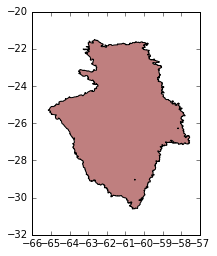

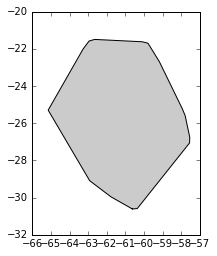

In [10]:
turtles.get_data().plot()
turtles.data_full.geometry.convex_hull.plot()

#### Let's put a buffer around the data, and plot that

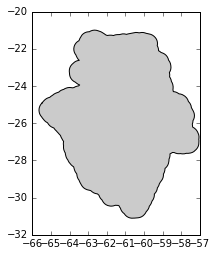

In [11]:
with_buffer = turtles.get_data().geometry.buffer(0.5)
with_buffer.plot()

#### The currently filtered shape data can be saved. If overwrite=True, the shapefile it was loaded from, will be overwritten. Otherwise you can provide a new shape_file as an argument.

In [12]:
turtles.save_shapefile(overwrite=True)

Saved data: ../data/FW_TURTLES/FW_TURTLES.shp 


## 4. Rasterize

#### Rasterize the data: we need a target raster_file to save it to, and a resolution.

In [13]:
turtles.rasterize_data(raster_file='./turtles.tif', pixel_size=0.5)

Data rasterized into file ./turtles.tif 
Resolution: x_res=15 y_res=18


#### Or at some point later, if you want to load the raster file

In [14]:
turtles_raster_data = turtles.load_raster_data()

Driver name: GeoTIFF 
Raster data from ./turtles.tif loaded.


In [15]:
turtles_raster_data.shape

(18, 15)

In [16]:
type(turtles_raster_data)

numpy.ndarray

#### A simple plot of the raster data

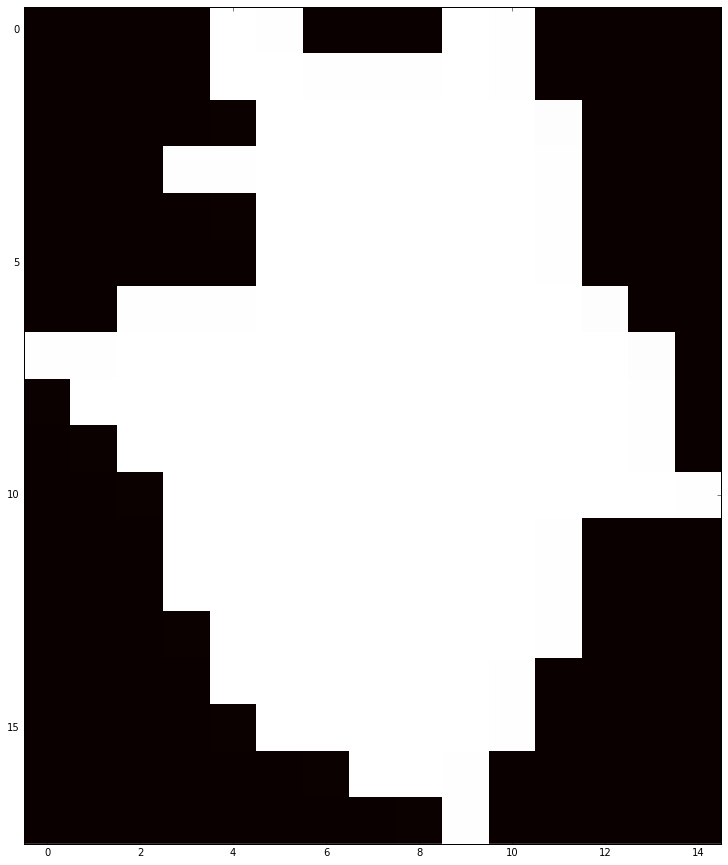

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=turtles_raster_data.shape) # careful with big images!
plt.imshow(turtles_raster_data, cmap="hot", interpolation="none")